In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
type(iris)

pandas.core.frame.DataFrame

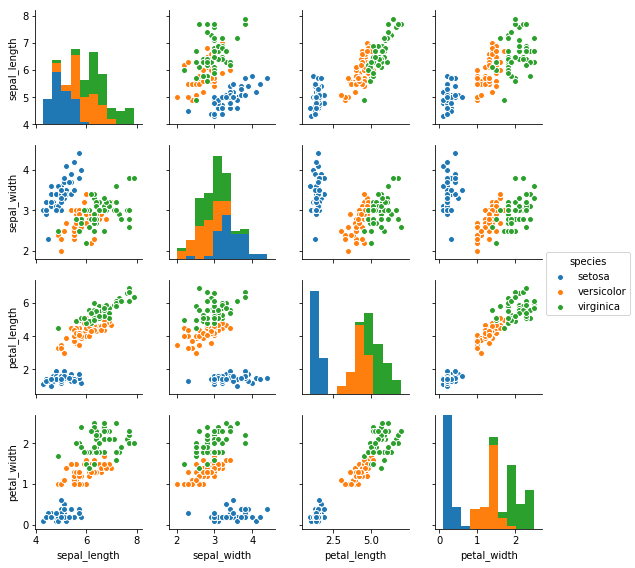

In [3]:
sns.pairplot(iris, hue='species', size=2)

In [4]:
X_iris = iris.drop('species', axis=1)

In [5]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y_iris = iris['species']

In [7]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Video Tutorial

## supervised leaning

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
house_price = [
    245, 312, 279, 308, 199, 219, 505, 324, 319, 255]
size = [
    14, 16, 17, 18.75, 11, 15.5, 23.5, 24.5, 14.25, 17]
size = np.array(size) # convert to np array
size_t = size.reshape((-1, 1)) # transpose

size_t, size.T, size, size[:,None]

(array([[14.  ],
        [16.  ],
        [17.  ],
        [18.75],
        [11.  ],
        [15.5 ],
        [23.5 ],
        [24.5 ],
        [14.25],
        [17.  ]]),
 array([14.  , 16.  , 17.  , 18.75, 11.  , 15.5 , 23.5 , 24.5 , 14.25,
        17.  ]),
 array([14.  , 16.  , 17.  , 18.75, 11.  , 15.5 , 23.5 , 24.5 , 14.25,
        17.  ]),
 array([[14.  ],
        [16.  ],
        [17.  ],
        [18.75],
        [11.  ],
        [15.5 ],
        [23.5 ],
        [24.5 ],
        [14.25],
        [17.  ]]))

In [9]:
regr = linear_model.LinearRegression()
regr.fit(size_t, house_price)

print("Coefs:\n", regr.coef_)
print("intercept:\n", regr.intercept_)


Coefs:
 [15.0174992]
intercept:
 38.94988864142539


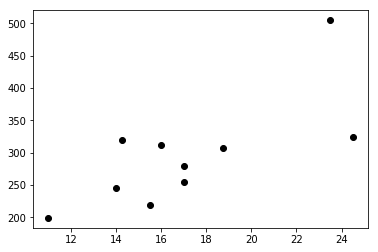

In [10]:
plt.plot(size_t, house_price, 'o', color='black') # price from size

In [11]:
# make predition
size_new = 11.2
# 1st method
price = regr.intercept_ + (size_new * regr.coef_)
print(price)
# 2nd method
price = regr.predict([[size_new]])
print(price)

[207.14587973]
[207.14587973]


In [24]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x,y)

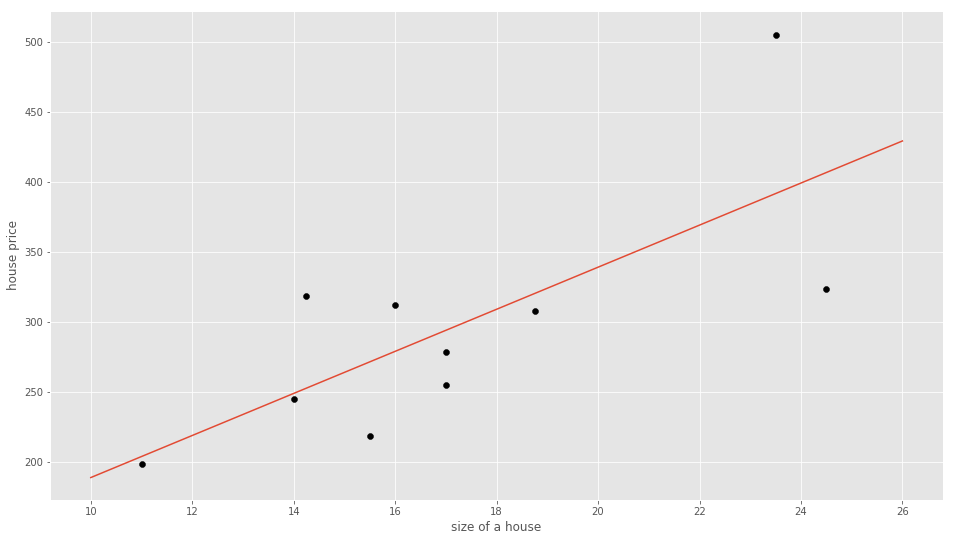

In [25]:
graph('regr.intercept_ + (x * regr.coef_)', range(10, 27))
plt.scatter(size, house_price, color='black')
plt.ylabel('house price')
plt.xlabel('size of a house')
plt.show()

## Unsupervised learning

1. Clustering
2. Assosiation

Clusteing: for analyzing and grouping data which doesn't have pre-labled class.
Algorithms:
- K-means
- Hierarchical Clustering
- Hidden Markov model

Association: discovers the probability of the co-occurence of items in a collection
Algorithms:
- Apriori algorithm
- FP-Growth

### K-means

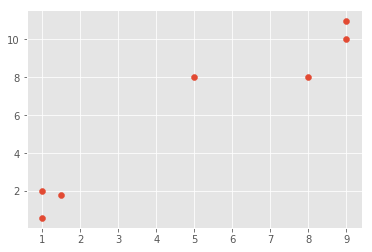

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
from sklearn.cluster import KMeans
x = [9,1,9,5,1.5,8,1]
y =[11,2,10,8,1.8,8,0.6]
plt.scatter(x,y)
plt.show()

In [15]:
X = np.array(list(zip(x,y)))

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_ # what class each point belongs to
print('centroid',centroids)
print('labels',labels)

centroid [[7.75       9.25      ]
 [1.16666667 1.46666667]]
labels [0 1 0 0 1 0 1]


coordinate: [ 9. 11.] 	label: 0
coordinate: [1. 2.] 	label: 1
coordinate: [ 9. 10.] 	label: 0
coordinate: [5. 8.] 	label: 0
coordinate: [1.5 1.8] 	label: 1
coordinate: [8. 8.] 	label: 0
coordinate: [1.  0.6] 	label: 1


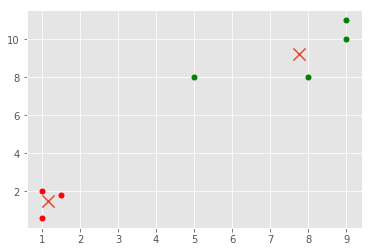

In [17]:
colors = ['g.','r.','c.','y.']
for i in range(len(X)):
    print('coordinate:', X[i], '\tlabel:', labels[i])
    plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:,1], marker='x', s=150, linewidths=5, zorder=10)
plt.show()    


### Association

People usually buy fries with sauce. Machine learns what should it favor.

In [18]:
%%bash
touch weather.csv
echo -e "Temperature Diff,Pressure Diff\n2,-3\n17,15" > weather.csv

In [19]:
%%bash
cat we*

Temperature Diff,Pressure Diff
2,-3
17,15


In [20]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

data = pd.read_csv('weather .csv')
data.shape
data.head()

,Temperature Diff,Pressure Diff
0,2,-3
1,17,15


In [21]:
f1 = data['Temperature Diff'].values
f2 = data['Pressure Diff'].values

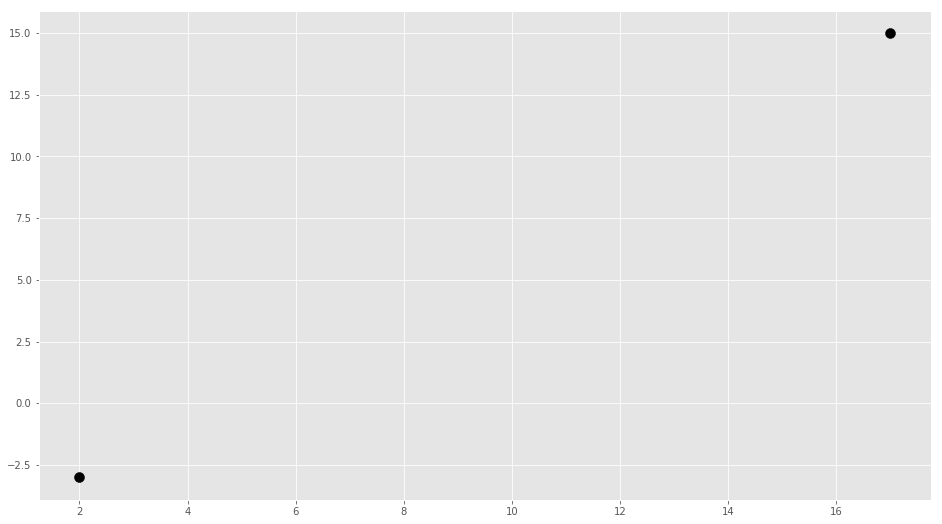

In [22]:
X = np.array(list(zip(f1,f2)))
plt.scatter(f1, f2, c='black',s=100)

In [23]:
data = pd.read_csv('CO2.csv')
data.head()

FileNotFoundError: File b'CO2.csv' does not exist

In [ ]:
janCO2 = data['Jan'].values
year = data['Year'].values
my = np.stack((year,janCO2))

def filter(my):
    # filter out zeroes
    my_clean = np.array([])
    for x in my.T:
        if my_clean.size == 0:
            # maybe this can be done easier,
            # how to define an empty np array
            # of a given size
            my_clean = np.array([x])
            continue
        if x[1] == 0:
            continue
        my_clean = np.concatenate((my_clean, [x]), axis=0)
    return my_clean.T
 
# the same as list(zip(..))
plt.scatter(*filter(my), color='blue')

augCO2 = data['Aug'].values
print(type(augCO2))
year = data['Year'].values
janCO2 = data['Jan'].values
year = data['Year'].values
my = np.stack((year,augCO2))

plt.scatter(*filter(my), color='red')
plt.show()

In [ ]:
X_data = data.drop('Year', axis=1)
X_data.head()
# guess a month??


In [ ]:
from math import sin, cos, pi
from random import random
print(random())
data = np.array([[0,0]])
clust_num = 3
for n in range(clust_num):
    a, b = 7 * random(), 7 * random()
    for i in range(100):
        r = random()
        fi = random()
        data = np.concatenate((data, [[a + r*cos(fi*2*pi), b + r*sin(fi*2*pi)]]))

plt.scatter(*data.T)

In [ ]:
plt.scatter(*data.T)

a = np.array([5, 6, 7, 8])
df = pd.DataFrame({'x': data.T[0], 'y': data.T[1]})
print(df.head())
df = df.drop(0, axis=0)
print(df.head())
df = df.round(2)
print(df.head())

In [ ]:
df.to_csv('Tree Clusters.csv', sep='\t', encoding='utf-8')

In [ ]:
%%bash
cat Tre*

In [ ]:
xval = df['x'].values
yval = df['y'].values
plt.scatter(xval, yval)

In [ ]:
X = np.stack((xval,yval))
print(X.shape) # (2, 500)
# or
X = np.array(list(zip(xval,yval)))
print(X.shape) # (500, 2)

print(X)
plt.scatter(*X.T, c='black', s=7)

In [ ]:
def dist(a, b, ax=1):
    # if ax == None, it calculates euclidian norm of a matrix
    return np.linalg.norm(a-b, axis=ax)

print(dist(np.array([0,0]), np.array([1,1]), 0))

In [ ]:
matr = np.array([[1,3],[-2,4],[4,-6]])
np.min(matr[:,0]), np.min(matr[:,1])

In [ ]:
k = 5 # number of clusters

C_x = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size=k)
C_y = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
# generated k random points
print(C)

In [ ]:
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
plt.scatter(*X.T)
plt.scatter(*C.T)

In [ ]:
from time import sleep

C_old = np.zeros(C.shape)

# cluster labels for elements (consist of 0 1 2)
clusters = np.zeros(len(X))
error = dist(C, C_old, None)

print('Distance between (matrices)', C, 'and', C_old, error)
fig_num = 1
while error != 0:
    for i in range(len(X)):
        # X[i] = np.array([2,5]), C = np.array([[3,4], [4,-2], ...etc])
        distances = dist(X[i],C) # an array of k elements
        cluster = np.argmin(distances)
        # print(cluster) # 0 1 or 2,
        # depending on what elem of C is the nearest to X[i]
        clusters[i] = cluster
    
    C_old = deepcopy(C)
    
    # redefine cluster center points - is in the middle of previous cluster
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        print('Number of points in {} cluster'.format(i), len(points))
        C[i] = np.mean(points, axis=0)

    error = dist(C, C_old, None)
    print(error)

    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    plt.figure(fig_num)
    fig_num += 1
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(*points.T, s=7, c=colors[i])
    plt.scatter(*C.T, marker='*', s=200, c='#050505')


In [ ]:
arr = np.array([[3,6],[5,3],[8,6],[5,4],[6,3.5]])
plt.scatter(*arr.T)

C_mean = np.mean(arr, axis=0)
plt.scatter(*C_mean.T, marker='*', s=400)
import scipy

C_gmean = scipy.stats.mstats.gmean(arr, axis=0)
plt.scatter(*C_gmean.T, marker='^', s=400)

C_hmean = scipy.stats.mstats.hmean(arr, axis=0)
plt.scatter(*C_hmean.T, marker='.', s=400)